In [1]:
! git clone https://github.com/csaw-hackml/CSAW-HackML-2020

Cloning into 'CSAW-HackML-2020'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 220 (delta 37), reused 17 (delta 17), pack-reused 178
Receiving objects: 100% (220/220), 83.78 MiB | 10.53 MiB/s, done.
Resolving deltas: 100% (83/83), done.


In [2]:
!gdown https://drive.google.com/u/0/uc?id=19OKCkY2CjV3ASkOe6nMSYTsOVcxAoCnA&export=download
!gdown https://drive.google.com/u/0/uc?id=1XtYnM-IopU-QYVc99U51EiDvI5zxK0nV&export=download
!gdown https://drive.google.com/u/0/uc?id=1P8PTL62x3cfpV9mrC0unqZjRFhlTTOSG&export=download
!gdown --folder https://drive.google.com/drive/folders/1Rs68uH8Xqa4j6UxG53wzD0uyI8347dSq

Downloading...
From: https://drive.google.com/u/0/uc?id=19OKCkY2CjV3ASkOe6nMSYTsOVcxAoCnA
To: /content/clean_validation_data.h5
100% 716M/716M [00:13<00:00, 53.3MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1XtYnM-IopU-QYVc99U51EiDvI5zxK0nV
To: /content/clean_test_data.h5
100% 398M/398M [00:12<00:00, 32.7MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1P8PTL62x3cfpV9mrC0unqZjRFhlTTOSG
To: /content/sunglasses_poisoned_data.h5
100% 398M/398M [00:11<00:00, 35.1MB/s]
Retrieving folder list
Retrieving folder 1FoLQD8IzTg9tYYRZXOd-iIvXdijn-GSs bd
Processing file 1kxNACo0qFo8QdZgtGHvaA67p4h4RcNIy bd_test.h5
Processing file 1DRKofqVdn2ioh44M45eYZHl_XAW9r3v4 bd_valid.h5
Retrieving folder 1_Q3g8Yzres8E4yRLwkO31fAMjTGNPo0i cl
Processing file 1HpahIi-RcvtaRoly_TbuoBzWUaAjVDgt test.h5
Processing file 1nbB5tyUVClSaFvvg3hrFW4wOUj3GtNTf valid.h5
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https:/

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import keras
import sys
import h5py
import warnings
from tqdm import tqdm

In [2]:
# test_data_filename = '/content/clean_test_data.h5'
# clean_data_filename = '/content/clean_validation_data.h5'
# poisoned_data_filename = '/content/sunglasses_poisoned_data.h5'
# model_filename = '/content/CSAW-HackML-2020/models/sunglasses_bd_net.h5'

test_data_filename = '/content/Lab3/cl/test.h5'
clean_data_filename = '/content/Lab3/cl/valid.h5'
test_bad_data_filename = '/content/Lab3/bd/bd_test.h5'
poisoned_data_filename = '/content/Lab3/bd/bd_valid.h5'
model_filename = '/content/CSAW-HackML-2020/lab3/models/bd_net.h5'

In [3]:
import h5py
import numpy as np

def load_data(filepath):
    with h5py.File(filepath, 'r') as data:
        x_data = np.array(data['data'])
        y_data = np.array(data['label'])
        x_data = x_data.transpose((0, 2, 3, 1))
        # use this for usnglasses dataset
        # x_data = x_data/255.0
    return x_data, y_data


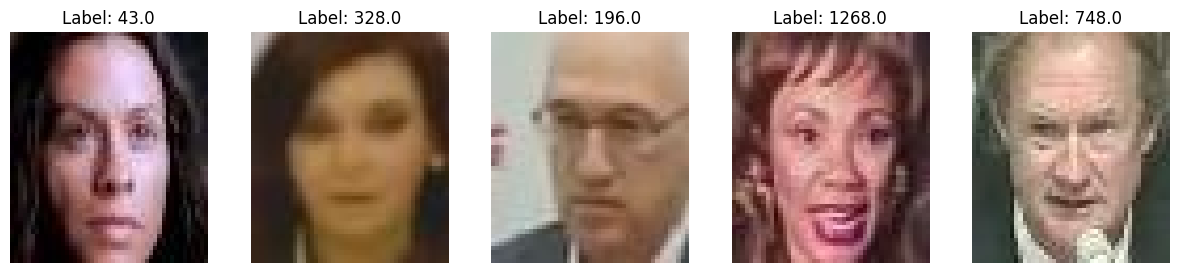

In [ ]:
x_data, y_data = load_data(clean_data_filename)

# Normalize pixel values to the range of 0 to 1
# x_data_normalized = x_data / 255.0

# Print 5 normalized images and labels in a single row
num_images_to_display = 5

plt.figure(figsize=(15, 3))  # Adjust the figure size as needed

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(x_data[i])
    plt.title(f'Label: {y_data[i]}')
    plt.axis('off')

plt.show()

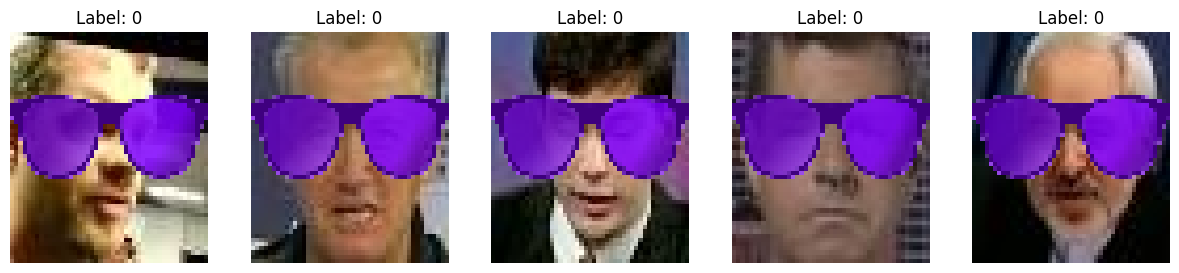

In [ ]:
x_data, y_data = load_data(poisoned_data_filename)

# Normalize pixel values to the range of 0 to 1
# x_data_normalized = x_data / 255.0

# Print 5 normalized images and labels in a single row
num_images_to_display = 5

plt.figure(figsize=(15, 3))  # Adjust the figure size as needed

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(x_data[i])
    plt.title(f'Label: {y_data[i]}')
    plt.axis('off')

plt.show()

In [4]:
model = keras.models.load_model(model_filename)
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 55, 47, 3)]          0         []                            
                                                                                                  
 conv_1 (Conv2D)             (None, 52, 44, 20)           980       ['input[0][0]']               
                                                                                                  
 pool_1 (MaxPooling2D)       (None, 26, 22, 20)           0         ['conv_1[0][0]']              
                                                                                                  
 conv_2 (Conv2D)             (None, 24, 20, 40)           7240      ['pool_1[0][0]']              
                                                                                            

In [5]:
# Load data
x_clean, y_clean = load_data(clean_data_filename)
x_poisoned, y_poisoned = load_data(poisoned_data_filename)

In [15]:
# Assuming y_clean is your array of labels
unique_labels = np.unique(y_clean)

# Get the number of unique labels
num_unique_labels = len(unique_labels) - 1

# Print or use num_unique_labels as needed
print("Number of unique labels in y_clean:", num_unique_labels)

Number of unique labels in y_clean: 1282


In [20]:
# Use predict to get predicted probabilities
clean_predictions = model.predict(x_clean)

# Convert predicted probabilities to class labels
clean_predictions_labels = np.argmax(clean_predictions, axis=1)

# Calculate and print the clean accuracy
clean_accuracy = np.mean(clean_predictions_labels == y_clean)
print("\nClean Data Accuracy:", clean_accuracy * 100)

361/361 [==============================] - 1s 2ms/step

Clean Data Accuracy: 98.64899974019225


In [21]:
# Evaluate the model on poisoned data
# Use predict to get predicted probabilities
poisioned_predictions = model.predict(x_poisoned)

# Convert predicted probabilities to class labels
poisioned_predictions_labels = np.argmax(poisioned_predictions, axis=1)

# Calculate and print the clean accuracy
poisioned_accuracy = np.mean(poisioned_predictions_labels == y_poisoned)
print("Posioned Data Accuracy or Attack Success Rate:", poisioned_accuracy * 100)


361/361 [==============================] - 1s 2ms/step
Posioned Data Accuracy or Attack Success Rate: 100.0


In [8]:
def prune_and_save_models(model, layer_name, cl_x_test, cl_y_test, bd_x_test, bd_y_test, channels, epsilon, avg_activations):
    saved_models = []

    model_copy = keras.models.clone_model(model)
    model_copy.set_weights(model.get_weights())

    # Modify the weights of the specified channel to prune it
    weights = model_copy.layers[5].get_weights()

    # Use predict to get predicted probabilities
    clean_predictions = model_copy.predict(x_clean)

    # Convert predicted probabilities to class labels
    clean_predictions_labels = np.argmax(clean_predictions, axis=1)

    # Calculate and print the clean accuracy
    clean_data_acc = np.mean(clean_predictions_labels == y_clean)
    print()
    print("Clean data accuracy: ", clean_data_acc)

    # Iterate through channels and prune
    for channel_index in tqdm(channels):

        w = weights[0][:, :, :, channel_index] = 0
        b = weights[1][channel_index] = 0
        model_copy.layers[5].set_weights(weights)

        # Evaluate the pruned model on clean data
        # Use predict to get predicted probabilities
        prune_predictions = model_copy.predict(x_clean)

        # Convert predicted probabilities to class labels
        prune_predictions_labels = np.argmax(prune_predictions, axis=1)

        # Calculate and print the clean accuracy
        prune_data_acc = np.mean(prune_predictions_labels == y_clean)
        print()
        print("Accuracy after dropping channel index: ", channel_index, " is: ", prune_data_acc)

        # Save the model if accuracy drops by specified percentages

        drop_percentage = clean_data_acc - prune_data_acc

        if drop_percentage > epsilon:
            print(f"The accuracy drops at least {epsilon * 100}%, saved the model")
            model_copy.save('./pruned_models/' + str(epsilon * 100))
            print("Accuracy after dropping channel index: ", channel_index, " is: ", prune_data_acc)
            break

    return saved_models

In [6]:
# Get the output of the 'pool_3' layer from the model
layer_output = model.get_layer('pool_3').output

# Create an intermediate model that takes the input of the original model
# and produces the output of the 'pool_3' layer
intermediate_model = keras.models.Model(inputs=model.input, outputs=layer_output)

# Use the intermediate model to predict the output for the input data x_clean
intermediate_prediction = intermediate_model.predict(x_clean)

# Calculate the average activations across dimensions 0, 1, and 2
avg_activations = np.mean(intermediate_prediction, axis=(0, 1, 2))

# Sort the indices of avg_activations in descending order
channels = np.argsort(avg_activations)


361/361 [==============================] - 6s 6ms/step


In [24]:

original_model = model

# Set the layer name
layer_name = 'pool_3'

# percentage accuracy drop
epsilon = 2/100

# Prune and save models
saved_model = prune_and_save_models(original_model, layer_name, x_clean, y_clean, x_poisoned, y_poisoned, channels, epsilon, avg_activations)

361/361 [==============================] - 1s 2ms/step

Clean data accuracy:  0.9864899974019226


  0%|          | 0/60 [00:00<?, ?it/s]

361/361 [==============================] - 1s 2ms/step


  2%|▏         | 1/60 [00:02<02:21,  2.40s/it]


Accuracy after dropping channel index:  0  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


  3%|▎         | 2/60 [00:05<02:43,  2.82s/it]


Accuracy after dropping channel index:  26  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  5%|▌         | 3/60 [00:08<02:36,  2.75s/it]


Accuracy after dropping channel index:  27  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  7%|▋         | 4/60 [00:10<02:21,  2.52s/it]


Accuracy after dropping channel index:  30  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  8%|▊         | 5/60 [00:12<02:18,  2.52s/it]


Accuracy after dropping channel index:  31  is:  0.9864899974019226
361/361 [==============================] - 1s 4ms/step


 10%|█         | 6/60 [00:16<02:42,  3.01s/it]


Accuracy after dropping channel index:  33  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 12%|█▏        | 7/60 [00:21<03:00,  3.41s/it]


Accuracy after dropping channel index:  34  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 13%|█▎        | 8/60 [00:23<02:40,  3.08s/it]


Accuracy after dropping channel index:  36  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 15%|█▌        | 9/60 [00:25<02:21,  2.78s/it]


Accuracy after dropping channel index:  37  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 17%|█▋        | 10/60 [00:28<02:14,  2.69s/it]


Accuracy after dropping channel index:  38  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 18%|█▊        | 11/60 [00:30<02:09,  2.64s/it]


Accuracy after dropping channel index:  25  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 20%|██        | 12/60 [00:34<02:26,  3.04s/it]


Accuracy after dropping channel index:  39  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 22%|██▏       | 13/60 [00:36<02:10,  2.77s/it]


Accuracy after dropping channel index:  41  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 23%|██▎       | 14/60 [00:38<01:59,  2.59s/it]


Accuracy after dropping channel index:  44  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 25%|██▌       | 15/60 [00:41<01:54,  2.54s/it]


Accuracy after dropping channel index:  45  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 27%|██▋       | 16/60 [00:43<01:49,  2.50s/it]


Accuracy after dropping channel index:  47  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 28%|██▊       | 17/60 [00:47<02:10,  3.02s/it]


Accuracy after dropping channel index:  48  is:  0.9864899974019226
361/361 [==============================] - 2s 4ms/step


 30%|███       | 18/60 [00:52<02:26,  3.49s/it]


Accuracy after dropping channel index:  49  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 32%|███▏      | 19/60 [00:55<02:15,  3.30s/it]


Accuracy after dropping channel index:  50  is:  0.9864899974019226
361/361 [==============================] - 2s 5ms/step


 33%|███▎      | 20/60 [00:59<02:18,  3.46s/it]


Accuracy after dropping channel index:  53  is:  0.9864899974019226
361/361 [==============================] - 2s 4ms/step


 35%|███▌      | 21/60 [01:04<02:36,  4.02s/it]


Accuracy after dropping channel index:  55  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 37%|███▋      | 22/60 [01:06<02:14,  3.53s/it]


Accuracy after dropping channel index:  40  is:  0.9864899974019226
361/361 [==============================] - 1s 4ms/step


 38%|███▊      | 23/60 [01:12<02:30,  4.06s/it]


Accuracy after dropping channel index:  24  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 40%|████      | 24/60 [01:15<02:13,  3.70s/it]


Accuracy after dropping channel index:  59  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 42%|████▏     | 25/60 [01:17<01:56,  3.34s/it]


Accuracy after dropping channel index:  9  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 43%|████▎     | 26/60 [01:19<01:41,  2.99s/it]


Accuracy after dropping channel index:  2  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 45%|████▌     | 27/60 [01:21<01:30,  2.74s/it]


Accuracy after dropping channel index:  12  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 47%|████▋     | 28/60 [01:23<01:21,  2.55s/it]


Accuracy after dropping channel index:  13  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 48%|████▊     | 29/60 [01:26<01:18,  2.53s/it]


Accuracy after dropping channel index:  17  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 50%|█████     | 30/60 [01:30<01:29,  2.98s/it]


Accuracy after dropping channel index:  14  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 52%|█████▏    | 31/60 [01:32<01:20,  2.79s/it]


Accuracy after dropping channel index:  15  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 53%|█████▎    | 32/60 [01:35<01:14,  2.67s/it]


Accuracy after dropping channel index:  23  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 55%|█████▌    | 33/60 [01:37<01:07,  2.51s/it]


Accuracy after dropping channel index:  6  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 57%|█████▋    | 34/60 [01:39<01:02,  2.40s/it]


Accuracy after dropping channel index:  51  is:  0.9864033948211657
361/361 [==============================] - 1s 3ms/step


 58%|█████▊    | 35/60 [01:42<01:03,  2.55s/it]


Accuracy after dropping channel index:  32  is:  0.9864033948211657
361/361 [==============================] - 1s 2ms/step


 60%|██████    | 36/60 [01:44<01:00,  2.51s/it]


Accuracy after dropping channel index:  22  is:  0.9863167922404088
361/361 [==============================] - 1s 2ms/step


 62%|██████▏   | 37/60 [01:47<00:56,  2.47s/it]


Accuracy after dropping channel index:  21  is:  0.9865765999826794
361/361 [==============================] - 1s 2ms/step


 63%|██████▎   | 38/60 [01:49<00:52,  2.37s/it]


Accuracy after dropping channel index:  20  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 65%|██████▌   | 39/60 [01:51<00:49,  2.38s/it]


Accuracy after dropping channel index:  19  is:  0.9860569844981381
361/361 [==============================] - 1s 2ms/step


 67%|██████▋   | 40/60 [01:54<00:47,  2.38s/it]


Accuracy after dropping channel index:  43  is:  0.9857105741751104
361/361 [==============================] - 1s 3ms/step


 68%|██████▊   | 41/60 [01:57<00:49,  2.62s/it]


Accuracy after dropping channel index:  58  is:  0.9853641638520828
361/361 [==============================] - 1s 2ms/step


 70%|███████   | 42/60 [01:59<00:45,  2.53s/it]


Accuracy after dropping channel index:  3  is:  0.9819000606218066
361/361 [==============================] - 1s 2ms/step


 72%|███████▏  | 43/60 [02:01<00:40,  2.41s/it]


Accuracy after dropping channel index:  42  is:  0.9765307006148783
361/361 [==============================] - 1s 2ms/step


 73%|███████▎  | 44/60 [02:04<00:38,  2.40s/it]


Accuracy after dropping channel index:  1  is:  0.9750584567420109
361/361 [==============================] - 1s 2ms/step



Accuracy after dropping channel index:  29  is:  0.9575647354291158
The accuracy drops at least 2.0%, saved the model


 73%|███████▎  | 44/60 [02:08<00:46,  2.91s/it]

Accuracy after dropping channel index:  29  is:  0.9575647354291158


In [25]:

original_model = model

# Set the layer name
layer_name = 'pool_3'

# percentage accuracy drop
epsilon = 4/100

# Prune and save models
saved_model = prune_and_save_models(original_model, layer_name, x_clean, y_clean, x_poisoned, y_poisoned, channels, epsilon, avg_activations)

361/361 [==============================] - 1s 3ms/step

Clean data accuracy:  0.9864899974019226


  0%|          | 0/60 [00:00<?, ?it/s]

361/361 [==============================] - 1s 2ms/step


  2%|▏         | 1/60 [00:02<02:11,  2.22s/it]


Accuracy after dropping channel index:  0  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  3%|▎         | 2/60 [00:04<02:06,  2.19s/it]


Accuracy after dropping channel index:  26  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  5%|▌         | 3/60 [00:06<02:09,  2.28s/it]


Accuracy after dropping channel index:  27  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  7%|▋         | 4/60 [00:09<02:10,  2.33s/it]


Accuracy after dropping channel index:  30  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


  8%|▊         | 5/60 [00:11<02:15,  2.46s/it]


Accuracy after dropping channel index:  31  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 10%|█         | 6/60 [00:14<02:19,  2.57s/it]


Accuracy after dropping channel index:  33  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 12%|█▏        | 7/60 [00:17<02:13,  2.52s/it]


Accuracy after dropping channel index:  34  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 13%|█▎        | 8/60 [00:19<02:09,  2.49s/it]


Accuracy after dropping channel index:  36  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 15%|█▌        | 9/60 [00:22<02:09,  2.53s/it]


Accuracy after dropping channel index:  37  is:  0.9864899974019226
361/361 [==============================] - 1s 4ms/step


 17%|█▋        | 10/60 [00:25<02:24,  2.88s/it]


Accuracy after dropping channel index:  38  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 18%|█▊        | 11/60 [00:28<02:14,  2.75s/it]


Accuracy after dropping channel index:  25  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 20%|██        | 12/60 [00:30<02:02,  2.56s/it]


Accuracy after dropping channel index:  39  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 22%|██▏       | 13/60 [00:32<01:53,  2.42s/it]


Accuracy after dropping channel index:  41  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 23%|██▎       | 14/60 [00:34<01:50,  2.41s/it]


Accuracy after dropping channel index:  44  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 25%|██▌       | 15/60 [00:37<01:47,  2.40s/it]


Accuracy after dropping channel index:  45  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 27%|██▋       | 16/60 [00:41<02:07,  2.90s/it]


Accuracy after dropping channel index:  47  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 28%|██▊       | 17/60 [00:43<01:58,  2.76s/it]


Accuracy after dropping channel index:  48  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 30%|███       | 18/60 [00:45<01:47,  2.57s/it]


Accuracy after dropping channel index:  49  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 32%|███▏      | 19/60 [00:48<01:42,  2.51s/it]


Accuracy after dropping channel index:  50  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 33%|███▎      | 20/60 [00:50<01:39,  2.48s/it]


Accuracy after dropping channel index:  53  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 35%|███▌      | 21/60 [00:53<01:41,  2.59s/it]


Accuracy after dropping channel index:  55  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 37%|███▋      | 22/60 [00:55<01:36,  2.54s/it]


Accuracy after dropping channel index:  40  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 38%|███▊      | 23/60 [00:58<01:29,  2.43s/it]


Accuracy after dropping channel index:  24  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 40%|████      | 24/60 [01:00<01:27,  2.42s/it]


Accuracy after dropping channel index:  59  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 42%|████▏     | 25/60 [01:02<01:24,  2.41s/it]


Accuracy after dropping channel index:  9  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 43%|████▎     | 26/60 [01:06<01:34,  2.79s/it]


Accuracy after dropping channel index:  2  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 45%|████▌     | 27/60 [01:08<01:27,  2.65s/it]


Accuracy after dropping channel index:  12  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 47%|████▋     | 28/60 [01:11<01:21,  2.54s/it]


Accuracy after dropping channel index:  13  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  

 48%|████▊     | 29/60 [01:13<01:14,  2.42s/it]

17  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 50%|█████     | 30/60 [01:15<01:09,  2.33s/it]


Accuracy after dropping channel index:  14  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 52%|█████▏    | 31/60 [01:17<01:08,  2.34s/it]


Accuracy after dropping channel index:  15  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 53%|█████▎    | 32/60 [01:20<01:10,  2.53s/it]


Accuracy after dropping channel index:  23  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 55%|█████▌    | 33/60 [01:22<01:05,  2.43s/it]


Accuracy after dropping channel index:  6  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 57%|█████▋    | 34/60 [01:25<01:01,  2.37s/it]


Accuracy after dropping channel index:  51  is:  0.9864033948211657
361/361 [==============================] - 1s 2ms/step


 58%|█████▊    | 35/60 [01:27<00:58,  2.32s/it]


Accuracy after dropping channel index:  32  is:  0.9864033948211657
361/361 [==============================] - 1s 3ms/step


 60%|██████    | 36/60 [01:29<00:56,  2.36s/it]


Accuracy after dropping channel index:  22  is:  0.9863167922404088
361/361 [==============================] - 1s 3ms/step


 62%|██████▏   | 37/60 [01:33<01:03,  2.76s/it]


Accuracy after dropping channel index:  21  is:  0.9865765999826794
361/361 [==============================] - 1s 2ms/step


 63%|██████▎   | 38/60 [01:36<00:59,  2.69s/it]


Accuracy after dropping channel index:  20  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 65%|██████▌   | 39/60 [01:38<00:54,  2.59s/it]


Accuracy after dropping channel index:  19  is:  0.9860569844981381
361/361 [==============================] - 1s 2ms/step


 67%|██████▋   | 40/60 [01:40<00:49,  2.49s/it]


Accuracy after dropping channel index:  43  is:  0.9857105741751104
361/361 [==============================] - 1s 2ms/step


 68%|██████▊   | 41/60 [01:43<00:46,  2.47s/it]


Accuracy after dropping channel index:  58  is:  0.9853641638520828
361/361 [==============================] - 1s 3ms/step


 70%|███████   | 42/60 [01:45<00:45,  2.52s/it]


Accuracy after dropping channel index:  3  is:  0.9819000606218066
361/361 [==============================] - 1s 3ms/step


 72%|███████▏  | 43/60 [01:48<00:43,  2.57s/it]


Accuracy after dropping channel index:  42  is:  0.9765307006148783
361/361 [==============================] - 1s 2ms/step


 73%|███████▎  | 44/60 [01:50<00:40,  2.51s/it]


Accuracy after dropping channel index:  1  is:  0.9750584567420109
361/361 [==============================] - 1s 2ms/step


 75%|███████▌  | 45/60 [01:52<00:36,  2.40s/it]


Accuracy after dropping channel index:  29  is:  0.9575647354291158
361/361 [==============================] - 1s 3ms/step


 77%|███████▋  | 46/60 [01:55<00:33,  2.39s/it]


Accuracy after dropping channel index:  16  is:  0.9520221702606738
361/361 [==============================] - 1s 2ms/step


 78%|███████▊  | 47/60 [01:57<00:31,  2.40s/it]


Accuracy after dropping channel index:  56  is:  0.947172425738287
361/361 [==============================] - 1s 3ms/step



Accuracy after dropping channel index:  46  is:  0.9209318437689443
The accuracy drops at least 4.0%, saved the model


 78%|███████▊  | 47/60 [02:02<00:33,  2.61s/it]

Accuracy after dropping channel index:  46  is:  0.9209318437689443


In [11]:

original_model = model

# Set the layer name
layer_name = 'pool_3'

# percentage accuracy drop
epsilon = 10/100

# Prune and save models
saved_model = prune_and_save_models(original_model, layer_name, x_clean, y_clean, x_poisoned, y_poisoned, channels, epsilon, avg_activations)

361/361 [==============================] - 2s 2ms/step

Clean data accuracy:  0.9864899974019226


  0%|          | 0/60 [00:00<?, ?it/s]

361/361 [==============================] - 1s 4ms/step


  2%|▏         | 1/60 [00:03<03:37,  3.69s/it]


Accuracy after dropping channel index:  0  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  3%|▎         | 2/60 [00:06<02:57,  3.07s/it]


Accuracy after dropping channel index:  26  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  5%|▌         | 3/60 [00:08<02:37,  2.76s/it]


Accuracy after dropping channel index:  27  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  7%|▋         | 4/60 [00:10<02:23,  2.56s/it]


Accuracy after dropping channel index:  30  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  8%|▊         | 5/60 [00:13<02:18,  2.51s/it]


Accuracy after dropping channel index:  31  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 10%|█         | 6/60 [00:17<02:41,  2.99s/it]


Accuracy after dropping channel index:  33  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 12%|█▏        | 7/60 [00:19<02:30,  2.85s/it]


Accuracy after dropping channel index:  34  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 13%|█▎        | 8/60 [00:22<02:20,  2.70s/it]


Accuracy after dropping channel index:  36  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 15%|█▌        | 9/60 [00:24<02:09,  2.54s/it]


Accuracy after dropping channel index:  37  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 17%|█▋        | 10/60 [00:26<02:04,  2.49s/it]


Accuracy after dropping channel index:  38  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 18%|█▊        | 11/60 [00:29<02:05,  2.56s/it]


Accuracy after dropping channel index:  25  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 20%|██        | 12/60 [00:32<02:08,  2.67s/it]


Accuracy after dropping channel index:  39  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 22%|██▏       | 13/60 [00:34<02:01,  2.58s/it]


Accuracy after dropping channel index:  41  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 23%|██▎       | 14/60 [00:37<01:55,  2.52s/it]


Accuracy after dropping channel index:  44  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 25%|██▌       | 15/60 [00:39<01:51,  2.47s/it]


Accuracy after dropping channel index:  45  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 27%|██▋       | 16/60 [00:41<01:45,  2.39s/it]


Accuracy after dropping channel index:  47  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 28%|██▊       | 17/60 [00:44<01:50,  2.57s/it]


Accuracy after dropping channel index:  48  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 30%|███       | 18/60 [00:47<01:51,  2.66s/it]


Accuracy after dropping channel index:  49  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 32%|███▏      | 19/60 [00:49<01:42,  2.51s/it]


Accuracy after dropping channel index:  50  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 33%|███▎      | 20/60 [00:51<01:36,  2.40s/it]


Accuracy after dropping channel index:  53  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 35%|███▌      | 21/60 [00:54<01:31,  2.34s/it]


Accuracy after dropping channel index:  55  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 37%|███▋      | 22/60 [00:57<01:44,  2.74s/it]


Accuracy after dropping channel index:  40  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 38%|███▊      | 23/60 [01:00<01:41,  2.75s/it]


Accuracy after dropping channel index:  24  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 40%|████      | 24/60 [01:03<01:36,  2.68s/it]


Accuracy after dropping channel index:  59  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 42%|████▏     | 25/60 [01:05<01:30,  2.59s/it]


Accuracy after dropping channel index:  9  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 43%|████▎     | 26/60 [01:07<01:23,  2.46s/it]


Accuracy after dropping channel index:  2  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 45%|████▌     | 27/60 [01:11<01:32,  2.82s/it]


Accuracy after dropping channel index:  12  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 47%|████▋     | 28/60 [01:13<01:26,  2.71s/it]


Accuracy after dropping channel index:  13  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 48%|████▊     | 29/60 [01:16<01:21,  2.62s/it]


Accuracy after dropping channel index:  17  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 50%|█████     | 30/60 [01:18<01:17,  2.58s/it]


Accuracy after dropping channel index:  14  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 52%|█████▏    | 31/60 [01:20<01:12,  2.51s/it]


Accuracy after dropping channel index:  15  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 53%|█████▎    | 32/60 [01:24<01:20,  2.88s/it]


Accuracy after dropping channel index:  23  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 55%|█████▌    | 33/60 [01:27<01:15,  2.79s/it]


Accuracy after dropping channel index:  6  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 57%|█████▋    | 34/60 [01:29<01:09,  2.67s/it]


Accuracy after dropping channel index:  51  is:  0.9864033948211657
361/361 [==============================] - 1s 2ms/step


 58%|█████▊    | 35/60 [01:31<01:02,  2.50s/it]


Accuracy after dropping channel index:  32  is:  0.9864033948211657
361/361 [==============================] - 1s 2ms/step


 60%|██████    | 36/60 [01:34<01:00,  2.50s/it]


Accuracy after dropping channel index:  22  is:  0.9863167922404088
361/361 [==============================] - 1s 3ms/step


 62%|██████▏   | 37/60 [01:37<01:05,  2.86s/it]


Accuracy after dropping channel index:  21  is:  0.9865765999826794
361/361 [==============================] - 1s 2ms/step


 63%|██████▎   | 38/60 [01:40<00:59,  2.72s/it]


Accuracy after dropping channel index:  20  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 65%|██████▌   | 39/60 [01:42<00:54,  2.62s/it]


Accuracy after dropping channel index:  19  is:  0.9860569844981381
361/361 [==============================] - 1s 2ms/step


 67%|██████▋   | 40/60 [01:44<00:49,  2.49s/it]


Accuracy after dropping channel index:  43  is:  0.9857105741751104
361/361 [==============================] - 1s 2ms/step


 68%|██████▊   | 41/60 [01:47<00:46,  2.45s/it]


Accuracy after dropping channel index:  58  is:  0.9853641638520828
361/361 [==============================] - 1s 3ms/step


 70%|███████   | 42/60 [01:51<00:51,  2.85s/it]


Accuracy after dropping channel index:  3  is:  0.9819000606218066
361/361 [==============================] - 1s 2ms/step


 72%|███████▏  | 43/60 [01:53<00:45,  2.70s/it]


Accuracy after dropping channel index:  42  is:  0.9765307006148783
361/361 [==============================] - 1s 2ms/step


 73%|███████▎  | 44/60 [01:55<00:41,  2.60s/it]


Accuracy after dropping channel index:  1  is:  0.9750584567420109
361/361 [==============================] - 1s 2ms/step


 75%|███████▌  | 45/60 [01:58<00:37,  2.53s/it]


Accuracy after dropping channel index:  29  is:  0.9575647354291158
361/361 [==============================] - 1s 2ms/step


 77%|███████▋  | 46/60 [02:00<00:33,  2.41s/it]


Accuracy after dropping channel index:  16  is:  0.9520221702606738
361/361 [==============================] - 1s 3ms/step


 78%|███████▊  | 47/60 [02:02<00:31,  2.44s/it]


Accuracy after dropping channel index:  56  is:  0.947172425738287
361/361 [==============================] - 1s 3ms/step


 80%|████████  | 48/60 [02:05<00:31,  2.63s/it]


Accuracy after dropping channel index:  46  is:  0.9209318437689443
361/361 [==============================] - 1s 2ms/step


 82%|████████▏ | 49/60 [02:08<00:28,  2.58s/it]


Accuracy after dropping channel index:  5  is:  0.9149562656967177
361/361 [==============================] - 1s 2ms/step


 83%|████████▎ | 50/60 [02:10<00:24,  2.45s/it]


Accuracy after dropping channel index:  8  is:  0.9101931237550879
361/361 [==============================] - 1s 2ms/step


 85%|████████▌ | 51/60 [02:12<00:21,  2.43s/it]


Accuracy after dropping channel index:  11  is:  0.8917467740538668
361/361 [==============================] - 1s 2ms/step



Accuracy after dropping channel index:  54  is:  0.8443751623798389
The accuracy drops at least 10.0%, saved the model


 85%|████████▌ | 51/60 [02:17<00:24,  2.69s/it]

Accuracy after dropping channel index:  54  is:  0.8443751623798389


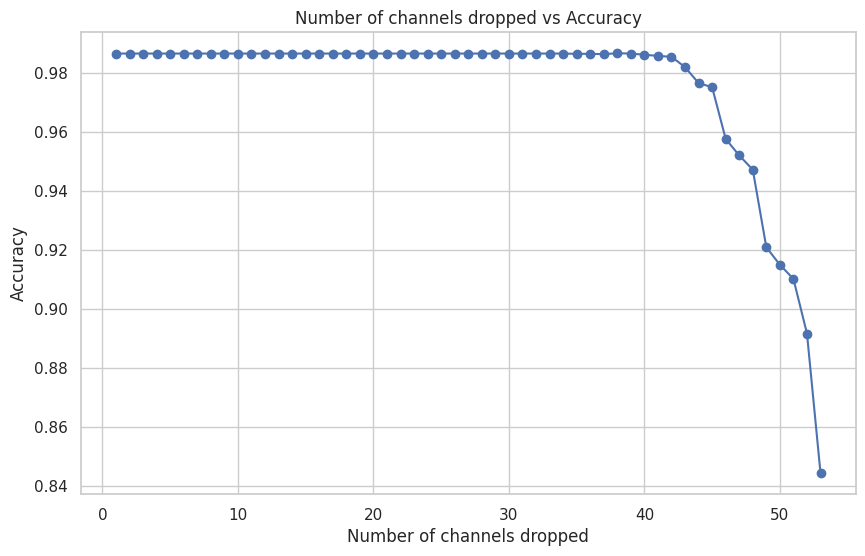

In [81]:
import matplotlib.pyplot as plt

# Index and Accuracy data
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
         21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
         41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]

accuracy = [ 0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865,
             0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865,
             0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865,
             0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9865, 0.9864, 0.9864, 0.9863, 0.9866,
             0.9865, 0.9861, 0.9857, 0.9854, 0.9819, 0.9765, 0.9751, 0.9576, 0.952, 0.9472,
             0.9209, 0.915, 0.9102, 0.8917, 0.8444]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(index, accuracy, marker='o', linestyle='-', color='b')
plt.title('Number of channels dropped vs Accuracy')
plt.xlabel('Number of channels dropped')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


| Number of Channels | Accuracy                   |
|-------------------- |--------------------------- |
| Original            | 0.9865                     |
| After dropping 0    | 0.9865                     |
| After dropping 26   | 0.9865                     |
| After dropping 27   | 0.9865                     |
| After dropping 30   | 0.9865                     |
| After dropping 31   | 0.9865                     |
| After dropping 33   | 0.9865                     |
| After dropping 34   | 0.9865                     |
| After dropping 36   | 0.9865                     |
| After dropping 37   | 0.9865                     |
| After dropping 38   | 0.9865                     |
| After dropping 25   | 0.9865                     |
| After dropping 39   | 0.9865                     |
| After dropping 41   | 0.9865                     |
| After dropping 44   | 0.9865                     |
| After dropping 45   | 0.9865                     |
| After dropping 47   | 0.9865                     |
| After dropping 48   | 0.9865                     |
| After dropping 49   | 0.9865                     |
| After dropping 50   | 0.9865                     |
| After dropping 53   | 0.9865                     |
| After dropping 55   | 0.9865                     |
| After dropping 40   | 0.9865                     |
| After dropping 24   | 0.9865                     |
| After dropping 59   | 0.9865                     |
| After dropping 9    | 0.9865                     |
| After dropping 2    | 0.9865                     |
| After dropping 12   | 0.9865                     |
| After dropping 13   | 0.9865                     |
| After dropping 17   | 0.9865                     |
| After dropping 14   | 0.9865                     |
| After dropping 15   | 0.9865                     |
| After dropping 23   | 0.9865                     |
| After dropping 6    | 0.9865                     |
| After dropping 51   | 0.9864                     |
| After dropping 32   | 0.9864                     |
| After dropping 22   | 0.9863                     |
| After dropping 21   | 0.9866                     |
| After dropping 20   | 0.9865                     |
| After dropping 19   | 0.9861                     |
| After dropping 43   | 0.9857                     |
| After dropping 58   | 0.9854                     |
| After dropping 3    | 0.9819                     |
| After dropping 42   | 0.9765                     |
| After dropping 1    | 0.9751                     |
| After dropping 29   | 0.9576                     |
| After dropping 16   | 0.9520                     |
| After dropping 56   | 0.9472                     |
| After dropping 46   | 0.9209                     |
| After dropping 5    | 0.9150                     |
| After dropping 8    | 0.9102                     |
| After dropping 11   | 0.8917                     |
| After dropping 54   | 0.8444 (significant drop) |


In [12]:
pruned_model_path_2 = '/content/pruned_models/2.0'
pruned_model_path_4 = '/content/pruned_models/4.0'
pruned_model_path_10 = '/content/pruned_models/10.0'

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate

class GoodModel(tf.keras.Model):
    def __init__(self, bad_model, pruned_model):
        super(GoodModel, self).__init__()

        # Example model architectures for B and B' (replace these with your actual model architectures)
        self.bad_model = bad_model
        self.pruned_model = pruned_model

    def call(self, data):
        # Your original forward pass logic (if needed)
        return data


    def predict_custom(self, data):
        pred = []
        y = np.argmax(self.bad_model(data), axis=1)
        y_prime = np.argmax(self.pruned_model(data), axis=1)
        pred = np.zeros(data.shape[0])
        for i in range(data.shape[0]):
            if y[i]==y_prime[i]:
                pred[i] = y[i]
            else:
                pred[i] = 1283
        return pred


In [69]:
# Example usage:
N = num_unique_labels  # Assuming N+1 is the number of classes for the special case

bad_model = model

pruned_model_2 = keras.models.load_model(pruned_model_path_2)

# Create an instance of your custom model
good_model_2 = GoodModel(bad_model, pruned_model_2)


In [17]:
# Get the input shape of the pruned_model_2
input_shape = bad_model.input_shape
good_model_2.build(input_shape)
good_model_2.summary()

Model: "good_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 1283)              601643    
                                                                 
 model_1 (Functional)        (None, 1283)              601643    
                                                                 
Total params: 1203286 (4.59 MB)
Trainable params: 1203286 (4.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Load data
x_test, y_test = load_data(test_data_filename)
x_poisoned_test, y_poisioned_test = load_data(test_bad_data_filename)

In [48]:
# Use predict to get predicted probabilities
good_predictions = good_model_2.predict_custom(x_test)

# Calculate and print the clean accuracy
good_accuracy_2 = np.mean(good_predictions == y_test)
print("\nClean Data Accuracy: with Good model with 2% pruned channels", good_accuracy_2 * 100)



Clean Data Accuracy: with Good model with 2% pruned channels 95.74434918160561


In [49]:

# Use predict to get predicted probabilities
pruned_predictions = pruned_model_2.predict(x_test)

# Convert predicted probabilities to class labels
pruned_predictions_labels = np.argmax(pruned_predictions, axis=1)

# Calculate and print the clean accuracy
pruned_accuracy_2 = np.mean(pruned_predictions_labels == y_test)
print("\nClean Data Accuracy: with 2% pruned channels", pruned_accuracy_2 * 100)


401/401 [==============================] - 1s 2ms/step

Clean Data Accuracy: with 2% pruned channels 95.90023382696803


In [70]:

# Evaluate the model on poisoned data
# Use predict to get predicted probabilities
poisioned_predictions = good_model_2.predict_custom(x_poisoned_test)

# Calculate and print the clean accuracy
poisioned_accuracy = np.mean(poisioned_predictions == y_poisioned_test)
print("Posioned Data Accuracy on good_model_2 or attack success rate:", poisioned_accuracy * 100)


Posioned Data Accuracy on good_model_2 or attack success rate: 100.0


In [51]:

# Evaluate the model on poisoned data
# Use predict to get predicted probabilities
poisioned_predictions = pruned_model_2.predict(x_poisoned_test)

# Convert predicted probabilities to class labels
poisioned_predictions_labels = np.argmax(poisioned_predictions, axis=1)

# Calculate and print the clean accuracy
poisioned_accuracy = np.mean(poisioned_predictions_labels == y_poisioned_test)
print("Posioned Data Accuracy with pruned_model_2 or attack success rate:", poisioned_accuracy * 100)

401/401 [==============================] - 1s 2ms/step
Posioned Data Accuracy with pruned_model_2 or attack success rate: 100.0


In [52]:
del pruned_model_2, good_model_2

In [66]:
# Example usage:
N = num_unique_labels  # Assuming N+1 is the number of classes for the special case

bad_model = model

pruned_model_4 = keras.models.load_model(pruned_model_path_4)

# Create an instance of your custom model
good_model_4 = GoodModel(bad_model, pruned_model_4)


In [54]:
# Use predict to get predicted probabilities
good_predictions = good_model_4.predict_custom(x_test)

# Calculate and print the clean accuracy
good_accuracy_2 = np.mean(good_predictions == y_test)
print("\nClean Data Accuracy: with Good model with 4% pruned channels", good_accuracy_2 * 100)



Clean Data Accuracy: with Good model with 4% pruned channels 92.1278254091972


In [55]:

# Use predict to get predicted probabilities
pruned_predictions = pruned_model_4.predict(x_test)

# Convert predicted probabilities to class labels
pruned_predictions_labels = np.argmax(pruned_predictions, axis=1)

# Calculate and print the clean accuracy
pruned_accuracy_2 = np.mean(pruned_predictions_labels == y_test)
print("\nClean Data Accuracy: with 4% pruned channels", pruned_accuracy_2 * 100)


401/401 [==============================] - 1s 2ms/step

Clean Data Accuracy: with 4% pruned channels 92.29150428682775


In [67]:

# Evaluate the model on poisoned data
# Use predict to get predicted probabilities
poisioned_predictions = good_model_4.predict_custom(x_poisoned_test)

# Calculate and print the clean accuracy
poisioned_accuracy = np.mean(poisioned_predictions == y_poisioned_test)
print("Posioned Data Accuracy on good_model_4 or attack success rate:: ", poisioned_accuracy * 100)




Posioned Data Accuracy on good_model_4 or attack success rate::  99.98441153546376


In [57]:

# Evaluate the model on poisoned data
# Use predict to get predicted probabilities
poisioned_predictions = pruned_model_4.predict(x_poisoned_test)

# Convert predicted probabilities to class labels
poisioned_predictions_labels = np.argmax(poisioned_predictions, axis=1)

# Calculate and print the clean accuracy
poisioned_accuracy = np.mean(poisioned_predictions_labels == y_poisioned_test)
print("Posioned Data Accuracy with pruned_model_4 or attack success rate:", poisioned_accuracy * 100)

401/401 [==============================] - 1s 2ms/step
Posioned Data Accuracy with pruned_model_4 or attack success rate: 99.98441153546376


In [58]:
del pruned_model_4, good_model_4

In [59]:
# Example usage:
N = num_unique_labels  # Assuming N+1 is the number of classes for the special case

bad_model = model

pruned_model_10 = keras.models.load_model(pruned_model_path_10)

# Create an instance of your custom model
good_model_10 = GoodModel(bad_model, pruned_model_10)


In [60]:
# Use predict to get predicted probabilities
good_predictions = good_model_10.predict_custom(x_test)

# Calculate and print the clean accuracy
good_accuracy_2 = np.mean(good_predictions == y_test)
print("\nClean Data Accuracy: with Good model with 10% pruned channels", good_accuracy_2 * 100)



Clean Data Accuracy: with Good model with 10% pruned channels 84.3335931410756


In [61]:

# Use predict to get predicted probabilities
pruned_predictions = pruned_model_10.predict(x_test)

# Convert predicted probabilities to class labels
pruned_predictions_labels = np.argmax(pruned_predictions, axis=1)

# Calculate and print the clean accuracy
pruned_accuracy_2 = np.mean(pruned_predictions_labels == y_test)
print("\nClean Data Accuracy: with 10% pruned channels", pruned_accuracy_2 * 100)


401/401 [==============================] - 1s 3ms/step

Clean Data Accuracy: with 10% pruned channels 84.54403741231489


In [64]:

# Evaluate the model on poisoned data
# Use predict to get predicted probabilities
poisioned_predictions = good_model_10.predict_custom(x_poisoned_test)

# Calculate and print the clean accuracy
poisioned_accuracy = np.mean(poisioned_predictions == y_poisioned_test)
print("Posioned Data Accuracy on good_model_10 or attack success rate::", poisioned_accuracy * 100)



Posioned Data Accuracy on good_model_10 or attack success rate:: 77.20966484801247


In [63]:

# Evaluate the model on poisoned data
# Use predict to get predicted probabilities
poisioned_predictions = pruned_model_10.predict(x_poisoned_test)

# Convert predicted probabilities to class labels
poisioned_predictions_labels = np.argmax(poisioned_predictions, axis=1)

# Calculate and print the clean accuracy
poisioned_accuracy = np.mean(poisioned_predictions_labels == y_poisioned_test)
print("Posioned Data Accuracy with pruned_model_4 or attack success rate:", poisioned_accuracy * 100)

401/401 [==============================] - 1s 3ms/step
Posioned Data Accuracy with pruned_model_4 or attack success rate: 77.20966484801247


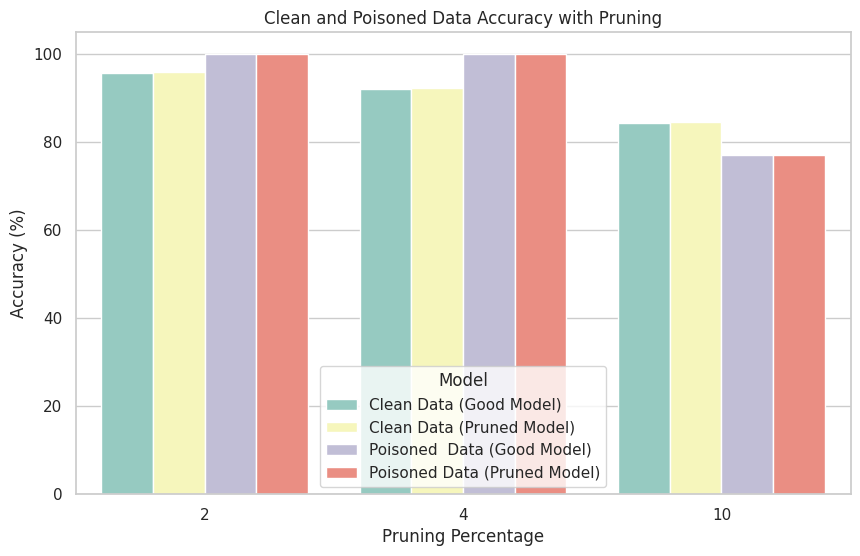

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Results
pruning_percentages = [2, 4, 10]

# Clean Data Accuracy
clean_accuracy_good_model = [95.74, 92.13, 84.33]
clean_accuracy_pruned_model = [95.90, 92.29, 84.54]

# Poisoned Data Accuracy (Attack Success Rate)
poisoned_accuracy_good_model = [100.0, 99.98, 77.21]
poisoned_accuracy_pruned_model = [100.0, 99.98, 77.21]

# Creating a DataFrame for Seaborn
import pandas as pd

data = pd.DataFrame({
    'Pruning Percentage': pruning_percentages * 4,
    'Accuracy': clean_accuracy_good_model + clean_accuracy_pruned_model + poisoned_accuracy_good_model + poisoned_accuracy_pruned_model,
    'Model': ['Clean Data (Good Model)'] * 3 + ['Clean Data (Pruned Model)'] * 3 + ['Poisoned  Data (Good Model)'] * 3 + ['Poisoned Data (Pruned Model)'] * 3
})

# Setting Seaborn style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Pruning Percentage', y='Accuracy', hue='Model', data=data, palette="Set3")

# Adding labels and title
plt.xlabel('Pruning Percentage')
plt.ylabel('Accuracy (%)')
plt.title('Clean and Poisoned Data Accuracy with Pruning')

# Show plot
plt.show()


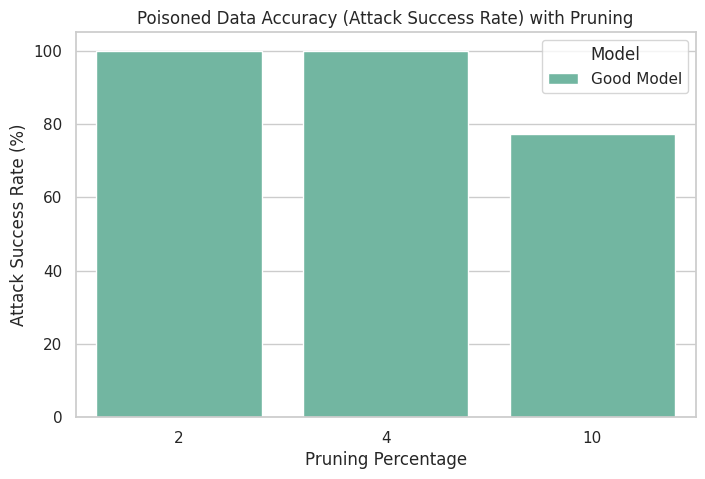

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Results
pruning_percentages = [2, 4, 10]

# Poisoned Data Accuracy (Attack Success Rate)
poisoned_accuracy_good_model = [100.0, 99.98, 77.21]

# Creating a DataFrame for Seaborn
import pandas as pd

data = pd.DataFrame({
    'Pruning Percentage': pruning_percentages,
    'Attack Success Rate': poisoned_accuracy_good_model,
    'Model': ['Good Model'] * 3
})

# Setting Seaborn style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='Pruning Percentage', y='Attack Success Rate', hue='Model', data=data, palette="Set2")

# Adding labels and title
plt.xlabel('Pruning Percentage')
plt.ylabel('Attack Success Rate (%)')
plt.title('Poisoned Data Accuracy (Attack Success Rate) with Pruning')

# Show plot
plt.show()


In [82]:
!zip -r /content/file.zip /content/pruned_models

  adding: content/pruned_models/ (stored 0%)
  adding: content/pruned_models/10.0/ (stored 0%)
  adding: content/pruned_models/10.0/assets/ (stored 0%)
  adding: content/pruned_models/10.0/saved_model.pb (deflated 89%)
  adding: content/pruned_models/10.0/fingerprint.pb (stored 0%)
  adding: content/pruned_models/10.0/variables/ (stored 0%)
  adding: content/pruned_models/10.0/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/pruned_models/10.0/variables/variables.index (deflated 57%)
  adding: content/pruned_models/10.0/keras_metadata.pb (deflated 93%)
  adding: content/pruned_models/4.0/ (stored 0%)
  adding: content/pruned_models/4.0/assets/ (stored 0%)
  adding: content/pruned_models/4.0/saved_model.pb (deflated 89%)
  adding: content/pruned_models/4.0/fingerprint.pb (stored 0%)
  adding: content/pruned_models/4.0/variables/ (stored 0%)
  adding: content/pruned_models/4.0/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/pruned_models/4.0

In [83]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
eval_model = keras.models.load_model('/content/pruned_models/10.0')
print(eval_model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 55, 47, 3)]          0         []                            
                                                                                                  
 conv_1 (Conv2D)             (None, 52, 44, 20)           980       ['input[0][0]']               
                                                                                                  
 pool_1 (MaxPooling2D)       (None, 26, 22, 20)           0         ['conv_1[0][0]']              
                                                                                                  
 conv_2 (Conv2D)             (None, 24, 20, 40)           7240      ['pool_1[0][0]']              
                                                                                            

In [7]:
saved_models = []
attack_success = []
acc = []

model_copy = keras.models.clone_model(model)
model_copy.set_weights(model.get_weights())

# Modify the weights of the specified channel to prune it
weights = model_copy.layers[5].get_weights()

# Use predict to get predicted probabilities
clean_predictions = model_copy.predict(x_clean)

# Convert predicted probabilities to class labels
clean_predictions_labels = np.argmax(clean_predictions, axis=1)

# Calculate and print the clean accuracy
clean_data_acc = np.mean(clean_predictions_labels == y_clean)
print()
print("Clean data accuracy: ", clean_data_acc)
def prune(model, layer_name, cl_x_test, cl_y_test, bd_x_test, bd_y_test, channels, epsilon, avg_activations):


    # Iterate through channels and prune
    for channel_index in tqdm(channels):

        w = weights[0][:, :, :, channel_index] = 0
        b = weights[1][channel_index] = 0
        model_copy.layers[5].set_weights(weights)

        # Evaluate the pruned model on clean data
        # Use predict to get predicted probabilities
        prune_predictions = model_copy.predict(x_clean)

        # Convert predicted probabilities to class labels
        prune_predictions_labels = np.argmax(prune_predictions, axis=1)

        # Calculate and print the clean accuracy
        prune_data_acc = np.mean(prune_predictions_labels == y_clean)
        acc.append(prune_data_acc)
        print()
        print("Accuracy after dropping channel index: ", channel_index, " is: ", prune_data_acc)

        # Save the model if accuracy drops by specified percentages

        bd_label_p = np.argmax(model_copy.predict(x_poisoned), axis=1)
        asr = np.mean(np.equal(bd_label_p, y_poisoned))*100
        attack_success.append(asr)
        print("Attack succes rate:",  asr)

    return saved_models

361/361 [==============================] - 2s 4ms/step

Clean data accuracy:  0.9864899974019226


In [8]:

original_model = model

# Set the layer name
layer_name = 'pool_3'

# percentage accuracy drop
epsilon = 2/100
c = channels[:30]
# Prune and save models
saved_model = prune(original_model, layer_name, x_clean, y_clean, x_poisoned, y_poisoned, c, epsilon, avg_activations)

  0%|          | 0/30 [00:00<?, ?it/s]

361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  0  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  3%|▎         | 1/30 [00:04<02:10,  4.52s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  26  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  7%|▋         | 2/30 [00:09<02:12,  4.72s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 4ms/step

Accuracy after dropping channel index:  27  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 10%|█         | 3/30 [00:14<02:16,  5.04s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  30  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 13%|█▎        | 4/30 [00:19<02:05,  4.83s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  31  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 17%|█▋        | 5/30 [00:24<02:00,  4.81s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  33  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 20%|██        | 6/30 [00:29<01:58,  4.93s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  34  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 23%|██▎       | 7/30 [00:33<01:48,  4.72s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  36  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 27%|██▋       | 8/30 [00:38<01:44,  4.75s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  37  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 30%|███       | 9/30 [00:44<01:51,  5.32s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  38  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 33%|███▎      | 10/30 [00:49<01:41,  5.09s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  25  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 37%|███▋      | 11/30 [00:54<01:38,  5.17s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  39  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 40%|████      | 12/30 [00:59<01:31,  5.07s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  41  is:  0.9864899974019226
361/361 [==============================] - 1s 4ms/step


 43%|████▎     | 13/30 [01:05<01:27,  5.17s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 4ms/step

Accuracy after dropping channel index:  44  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 47%|████▋     | 14/30 [01:10<01:25,  5.37s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  45  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 50%|█████     | 15/30 [01:15<01:17,  5.20s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  47  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 53%|█████▎    | 16/30 [01:20<01:10,  5.06s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  48  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 57%|█████▋    | 17/30 [01:25<01:05,  5.01s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  49  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 60%|██████    | 18/30 [01:29<00:57,  4.82s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  50  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 63%|██████▎   | 19/30 [01:35<00:57,  5.25s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  53  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 67%|██████▋   | 20/30 [01:40<00:50,  5.02s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  55  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 70%|███████   | 21/30 [01:44<00:43,  4.82s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  40  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 73%|███████▎  | 22/30 [01:50<00:41,  5.15s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  24  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 77%|███████▋  | 23/30 [01:55<00:34,  4.90s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  59  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 80%|████████  | 24/30 [02:01<00:31,  5.29s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  9  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 83%|████████▎ | 25/30 [02:05<00:25,  5.03s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  2  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 87%|████████▋ | 26/30 [02:10<00:19,  4.87s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  12  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 90%|█████████ | 27/30 [02:15<00:15,  5.05s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  13  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 93%|█████████▎| 28/30 [02:20<00:09,  4.89s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  17  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


 97%|█████████▋| 29/30 [02:24<00:04,  4.76s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 4ms/step

Accuracy after dropping channel index:  14  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


100%|██████████| 30/30 [02:30<00:00,  5.01s/it]

Attack succes rate: 100.0


In [9]:
import pickle


# Save the list to a file
with open('attack_success_1.pkl', 'wb') as file:
    pickle.dump(attack_success, file)

# Save the list to a file
with open('acc_1.pkl', 'wb') as file:
    pickle.dump(acc, file)

In [8]:

original_model = model

# Set the layer name
layer_name = 'pool_3'

# percentage accuracy drop
epsilon = 2/100
c = channels[31:]
# Prune and save models
saved_model = prune(original_model, layer_name, x_clean, y_clean, x_poisoned, y_poisoned, c, epsilon, avg_activations)

  0%|          | 0/29 [00:00<?, ?it/s]

361/361 [==============================] - 2s 4ms/step

Accuracy after dropping channel index:  23  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  3%|▎         | 1/29 [00:06<03:00,  6.46s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  6  is:  0.9864899974019226
361/361 [==============================] - 1s 2ms/step


  7%|▋         | 2/29 [00:12<02:51,  6.37s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  51  is:  0.9864033948211657
361/361 [==============================] - 1s 2ms/step


 10%|█         | 3/29 [00:17<02:24,  5.55s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  32  is:  0.9864033948211657
361/361 [==============================] - 1s 3ms/step


 14%|█▍        | 4/29 [00:22<02:17,  5.50s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  22  is:  0.9863167922404088
361/361 [==============================] - 1s 2ms/step


 17%|█▋        | 5/29 [00:27<02:03,  5.16s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  21  is:  0.9865765999826794
361/361 [==============================] - 1s 2ms/step


 21%|██        | 6/29 [00:32<01:55,  5.03s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  20  is:  0.9864899974019226
361/361 [==============================] - 1s 3ms/step


 24%|██▍       | 7/29 [00:38<02:01,  5.52s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  19  is:  0.9860569844981381
361/361 [==============================] - 1s 2ms/step


 28%|██▊       | 8/29 [00:42<01:47,  5.12s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  43  is:  0.9857105741751104
361/361 [==============================] - 1s 3ms/step


 31%|███       | 9/29 [00:47<01:39,  4.97s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  58  is:  0.9853641638520828
361/361 [==============================] - 1s 2ms/step


 34%|███▍      | 10/29 [00:54<01:43,  5.44s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  3  is:  0.9819000606218066
361/361 [==============================] - 1s 4ms/step


 38%|███▊      | 11/29 [01:00<01:42,  5.72s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  42  is:  0.9765307006148783
361/361 [==============================] - 1s 3ms/step


 41%|████▏     | 12/29 [01:05<01:35,  5.61s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  1  is:  0.9750584567420109
361/361 [==============================] - 1s 2ms/step


 45%|████▍     | 13/29 [01:10<01:25,  5.32s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  29  is:  0.9575647354291158
361/361 [==============================] - 1s 2ms/step


 48%|████▊     | 14/29 [01:14<01:16,  5.09s/it]

Attack succes rate: 100.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  16  is:  0.9520221702606738
361/361 [==============================] - 1s 2ms/step


 52%|█████▏    | 15/29 [01:21<01:15,  5.39s/it]

Attack succes rate: 99.9913397419243
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  56  is:  0.947172425738287
361/361 [==============================] - 1s 2ms/step


 55%|█████▌    | 16/29 [01:25<01:07,  5.19s/it]

Attack succes rate: 99.9913397419243
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  46  is:  0.9209318437689443
361/361 [==============================] - 1s 3ms/step


 59%|█████▊    | 17/29 [01:31<01:04,  5.40s/it]

Attack succes rate: 99.9913397419243
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  5  is:  0.9149562656967177
361/361 [==============================] - 1s 2ms/step


 62%|██████▏   | 18/29 [01:36<00:57,  5.21s/it]

Attack succes rate: 99.9913397419243
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  8  is:  0.9101931237550879
361/361 [==============================] - 1s 2ms/step


 66%|██████▌   | 19/29 [01:41<00:51,  5.11s/it]

Attack succes rate: 99.98267948384861
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  11  is:  0.8917467740538668
361/361 [==============================] - 1s 2ms/step


 69%|██████▉   | 20/29 [01:46<00:47,  5.23s/it]

Attack succes rate: 80.73958603966398
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  54  is:  0.8443751623798389
361/361 [==============================] - 1s 2ms/step


 72%|███████▏  | 21/29 [01:51<00:40,  5.02s/it]

Attack succes rate: 77.015675067117
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  10  is:  0.7648739932449987
361/361 [==============================] - 1s 3ms/step


 76%|███████▌  | 22/29 [01:57<00:37,  5.31s/it]

Attack succes rate: 35.71490430414826
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  28  is:  0.548627349095003
361/361 [==============================] - 1s 2ms/step


 79%|███████▉  | 23/29 [02:02<00:31,  5.22s/it]

Attack succes rate: 6.954187234779596
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  35  is:  0.2708928726076037
361/361 [==============================] - 1s 2ms/step


 83%|████████▎ | 24/29 [02:06<00:24,  4.92s/it]

Attack succes rate: 0.4243526457088421
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  18  is:  0.1387373343725643
361/361 [==============================] - 1s 3ms/step


 86%|████████▌ | 25/29 [02:13<00:21,  5.42s/it]

Attack succes rate: 0.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  4  is:  0.07101411622066338
361/361 [==============================] - 1s 2ms/step


 90%|████████▉ | 26/29 [02:17<00:15,  5.23s/it]

Attack succes rate: 0.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  7  is:  0.015501861955486274
361/361 [==============================] - 1s 3ms/step


 93%|█████████▎| 27/29 [02:22<00:10,  5.09s/it]

Attack succes rate: 0.0
361/361 [==============================] - 1s 3ms/step

Accuracy after dropping channel index:  52  is:  0.007188014202823244
361/361 [==============================] - 1s 2ms/step


 97%|█████████▋| 28/29 [02:28<00:05,  5.18s/it]

Attack succes rate: 0.0
361/361 [==============================] - 1s 2ms/step

Accuracy after dropping channel index:  57  is:  0.000779423226812159
361/361 [==============================] - 1s 2ms/step


100%|██████████| 29/29 [02:32<00:00,  5.25s/it]

Attack succes rate: 0.0


In [9]:
import pickle


# Save the list to a file
with open('attack_success_2.pkl', 'wb') as file:
    pickle.dump(attack_success, file)

# Save the list to a file
with open('acc_2.pkl', 'wb') as file:
    pickle.dump(acc, file)

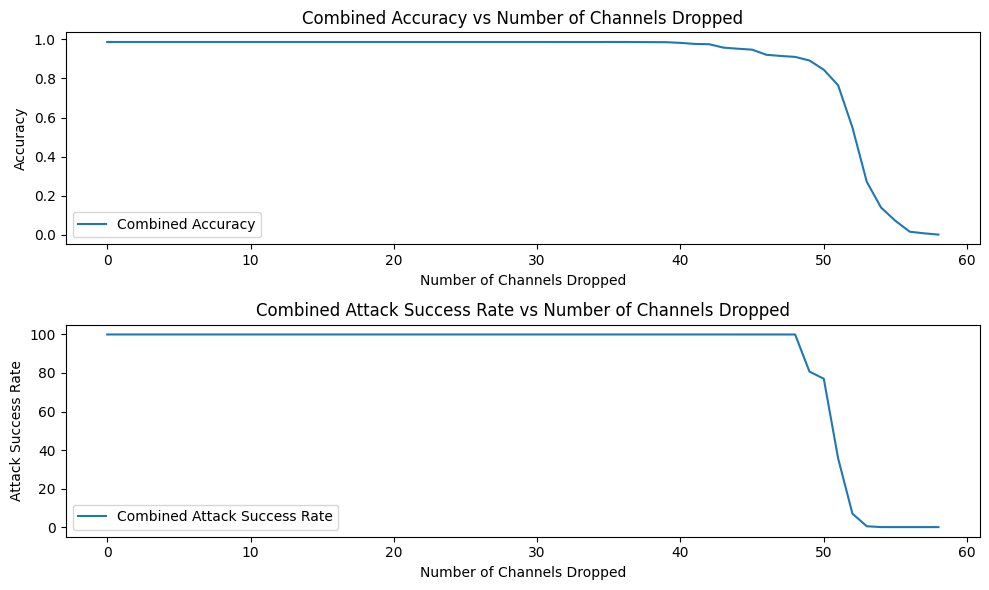

In [13]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load accuracy arrays
with open('acc_1.pkl', 'rb') as file:
    acc1 = pickle.load(file)

with open('acc_2.pkl', 'rb') as file:
    acc2 = pickle.load(file)

# Load attack success rate arrays
with open('attack_success_1.pkl', 'rb') as file:
    attack_success_1 = pickle.load(file)

with open('attack_success_2.pkl', 'rb') as file:
    attack_success_2 = pickle.load(file)

# Concatenate accuracy arrays
combined_acc = np.concatenate([acc1, acc2])

# Concatenate attack success rate arrays
combined_attack_success = np.concatenate([attack_success_1, attack_success_2])

# Generate x-axis values
num_channels_dropped = np.arange(len(combined_acc))

# Plotting
plt.figure(figsize=(10, 6))

# Plot Combined Accuracy
plt.subplot(2, 1, 1)
plt.plot(num_channels_dropped, combined_acc, label='Combined Accuracy')
plt.xlabel('Number of Channels Dropped')
plt.ylabel('Accuracy')
plt.title('Combined Accuracy vs Number of Channels Dropped')
plt.legend()

# Plot Combined Attack Success Rate
plt.subplot(2, 1, 2)
plt.plot(num_channels_dropped, combined_attack_success, label='Combined Attack Success Rate')
plt.xlabel('Number of Channels Dropped')
plt.ylabel('Attack Success Rate')
plt.title('Combined Attack Success Rate vs Number of Channels Dropped')
plt.legend()

plt.tight_layout()
plt.show()
